<a href="https://colab.research.google.com/github/UnplugCharger/Week-7-IP/blob/master/WEEK_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING OUR LIBRARIES

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

#Loading and Looking into our datasets

In [94]:
housing=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [95]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###cheking our datatypes

In [96]:
housing.dtypes


id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### getting the basic statistics for ourdata

In [97]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [98]:
housing.shape

(21613, 20)

Our dataset has 21613 rows and 20 columns

In [99]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [100]:
sniff(housing)

,sample,data type,percent duplicated,percent missing
id,7.129301e+09,int64,0.013881,0.0
zipcode,9.817800e+04,int64,0.013881,0.0
yr_renovated,0.000000e+00,int64,0.013881,0.0
yr_built,1.955000e+03,int64,0.013881,0.0
sqft_basement,0.000000e+00,int64,0.013881,0.0
sqft_above,1.180000e+03,int64,0.013881,0.0
grade,7.000000e+00,int64,0.013881,0.0
sqft_living15,1.340000e+03,int64,0.013881,0.0
condition,3.000000e+00,int64,0.013881,0.0
waterfront,0.000000e+00,int64,0.013881,0.0


from the above we can see that our dataset is a pretty clean one . we dont have any missing values  but 0.013881% of our values are dublicated.

we will drop them in the next column

In [101]:
housing.drop_duplicates(inplace=True)

In [102]:
housing.shape

(21610, 20)

After dropping the duplicates we are only three rows less .Which is amazing

#EXPLORATOY DATA ANALYSIS

## Univariate Analysis

In this section we will look at the price distribution since its our target variable

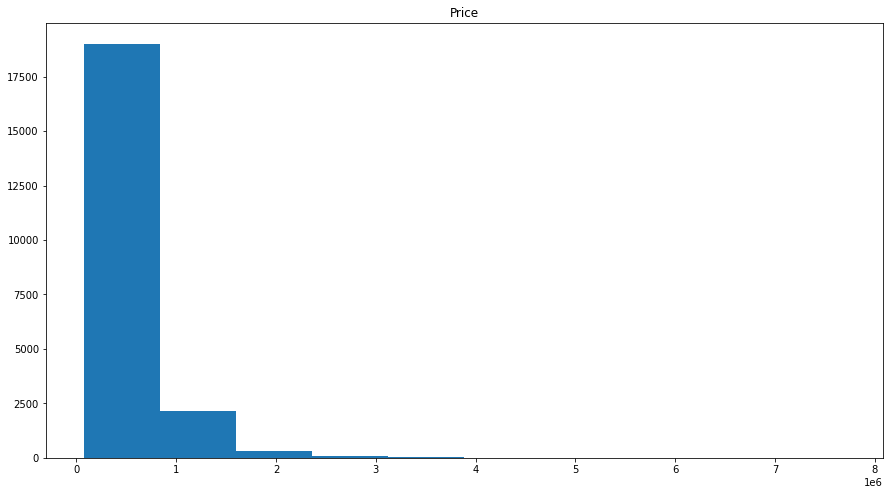

In [103]:
plt.hist(housing['price'])
plt.title("Price")
plt.show()

The distribution of price is reallyskewed to the right .... can we bring it to a normal distribution by doing a log trnsformation ... lets see ....

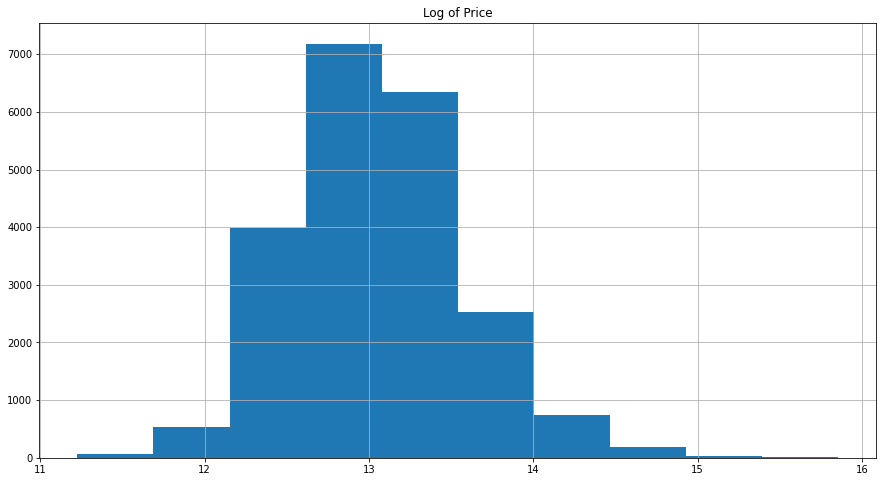

In [104]:

housing['price'].apply(np.log).hist()
plt.title('Log of Price')
plt.show()

The distribution of the log of price is better that the distribution of the price and therefore we will use the log for our  regression models instead  of the  price.

##Bivariate Analysis and Multivariate Analysis

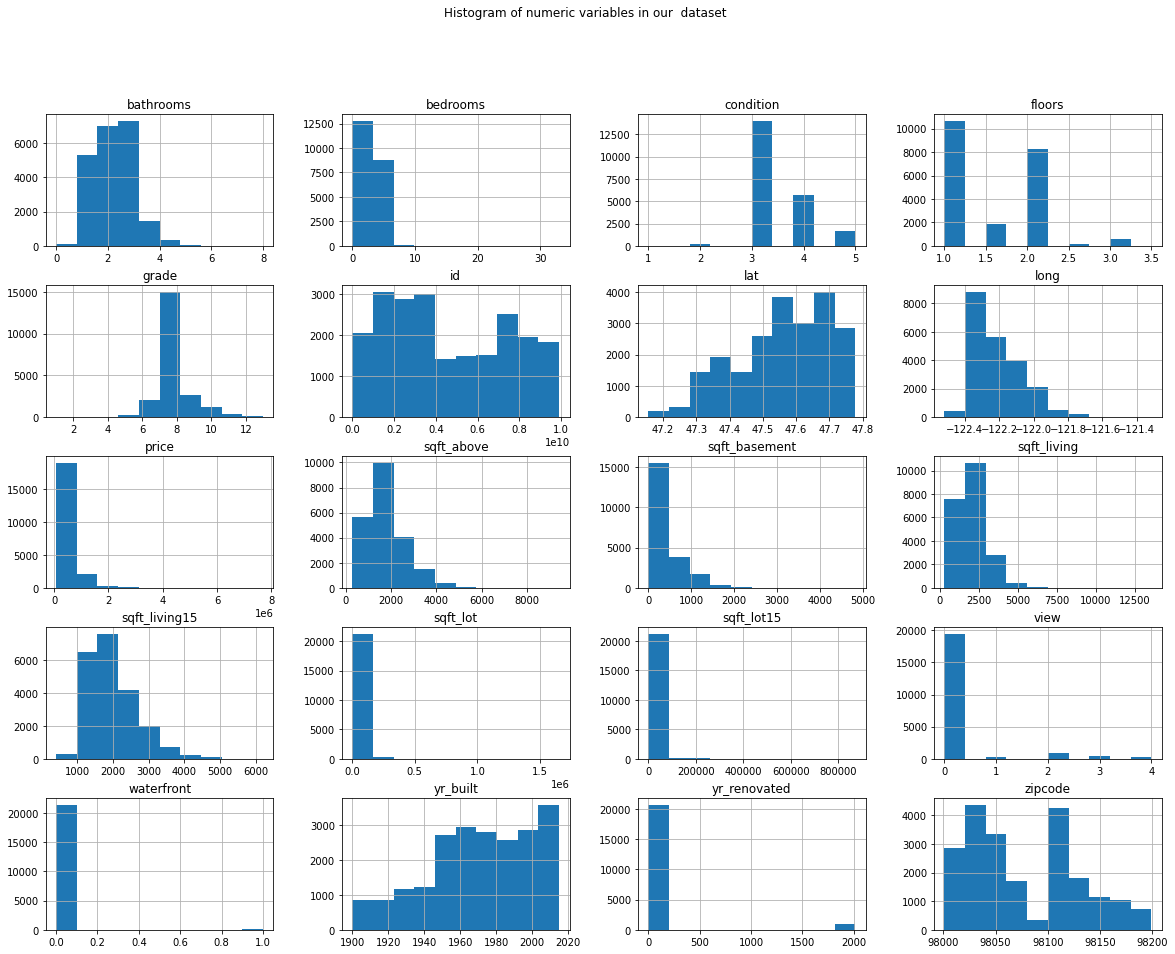

In [105]:
housing.hist(bins=10, figsize=(20,15))
plt.suptitle("Histogram of numeric variables in our  dataset")
plt.savefig('Histogram')
plt.show()

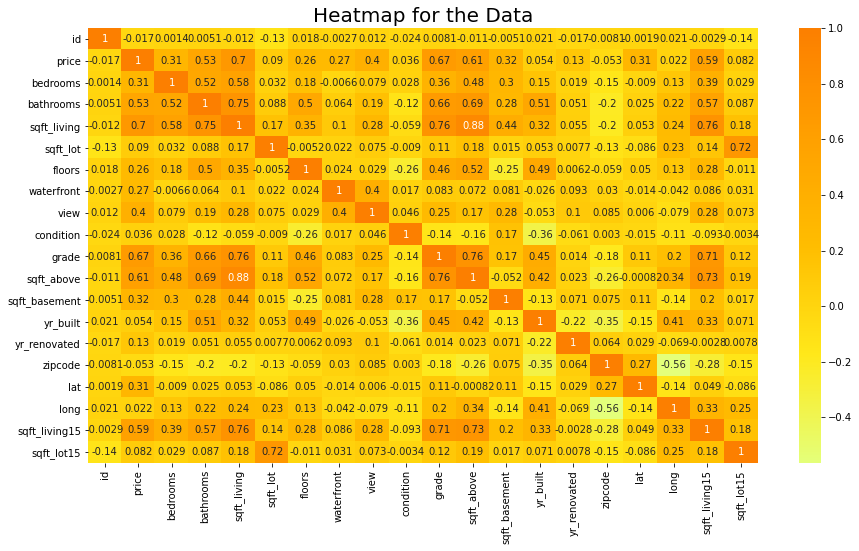

In [106]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(housing.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

From the above we can see that Price has a strong correlation with   sqt_living15,sqft_above, grade, sqft living and bathrooms

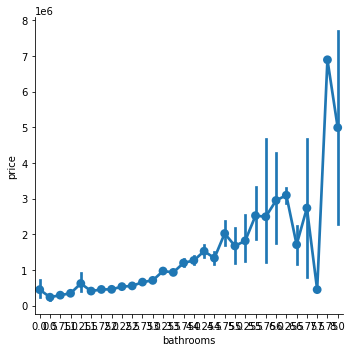

In [107]:
sns.catplot(x="bathrooms",y="price",kind="point",data=housing)

#BASELINE MODELS

In [172]:
X = housing.drop('price',axis=1)
y = housing['price']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Multiple Linear Regression Models



In [110]:
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = regressor.predict(X_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

print(f'The root mean root square error of our model is \n{rmse}')
print(f'The  mean  square error of our model is\n{mse}')

The root mean root square error of our model is 
206553.84252297654
The  mean  square error of our model is
42664489861.00659


## Lasso Reggression Models

In [113]:
from sklearn.linear_model import Lasso

# Creating lasso regression with alpha value
regr = Lasso(alpha=1)

# Fitting the linear regression
model = regr.fit(X_train, y_train)
model

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [114]:
y_lasso= model.predict(X_test)

In [115]:
mse = mean_squared_error(y_test, y_lasso)

rmse = math.sqrt(mse)

print(f'The root mean root square error of our model is \n{rmse}')
print(f'The  mean  square error of our model is\n{mse}')
print(f"lasso score:\n{model.score(X_train, y_train)}") 

The root mean root square error of our model is 
206553.80242044944
The  mean  square error of our model is
42664473294.34606
lasso score:
0.7005265667063628


## Ridge  Regression Models

In [116]:
regression = LinearRegression()
regression.fit(X_train,y_train)
first_model = (mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(f'{first_model} will be our indicator to determine if the regularized ridge regression model is superior or not.')



42664489861.00659 will be our indicator to determine if the regularized ridge regression model is superior or not.


In [117]:
ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
print(second_model)

52943514175.22022


Our Ridge with zero alpha performs even worse that  the simple linear model

## Elastic Net Regression

In [118]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst.

42664489861.00659


In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
elastic=ElasticNet(normalize=True)
elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
print(second_model)

140804381242.8222


We will compre these to perfomances that our finalmodls will give

## Quantile Regression

In [121]:
# prepare the quantile that we want to work with
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# loop to change the columns
for i in np.arange(0,19,1):
  
  x = X.iloc[:,i]
  mod = smf.quantreg('y ~ x',housing)
  # loop to calculate the quantile data
  for qt in quantiles:
    
    res = mod.fit(q = qt)
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


      qt     intercept    x_coef  cf_lower_bound  cf_upper_bound
0    0.1  8.801410e-15  0.000056        0.000055        0.000058
1    0.2  7.670713e-15  0.000061        0.000059        0.000062
2    0.3  1.010514e-14  0.000065        0.000064        0.000066
3    0.4  1.295497e-14  0.000082        0.000080        0.000083
4    0.5  1.251243e-14  0.000083        0.000082        0.000084
..   ...           ...       ...             ...             ...
166  0.5  4.408256e+05  0.870936        0.733319        1.008553
167  0.6  5.043070e+05  0.979891        0.816693        1.143089
168  0.7  5.677876e+05  1.331949        1.169391        1.494507
169  0.8  6.647360e+05  1.853605        1.661589        2.045621
170  0.9  7.366973e+05  5.714143        5.549026        5.879260

[171 rows x 5 columns]


In [122]:
params.head(50)

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,8.801410e-15,0.000056,0.000055,0.000058
1,0.2,7.670713e-15,0.000061,0.000059,0.000062
2,0.3,1.010514e-14,0.000065,0.000064,0.000066
3,0.4,1.295497e-14,0.000082,0.000080,0.000083
4,0.5,1.251243e-14,0.000083,0.000082,0.000084
5,0.6,1.274079e-14,0.000084,0.000083,0.000085
6,0.7,1.281476e-14,0.000086,0.000085,0.000087
7,0.8,1.014807e-14,0.000090,0.000089,0.000091
8,0.9,1.962494e-14,0.000107,0.000106,0.000108
9,0.1,1.198000e+05,40050.000001,37230.100748,42869.899253


In [123]:

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             -0.01280
Model:                       QuantReg   Bandwidth:                   3.410e+04
Method:                 Least Squares   Sparsity:                    1.862e+06
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        18:57:23   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.367e+05   4636.968    158.875      0.000    7.28e+05    7.46e+05
x              5.7141      0.084     67.832      0.000       5.549       5.879

The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


<Figure size 1080x576 with 0 Axes>

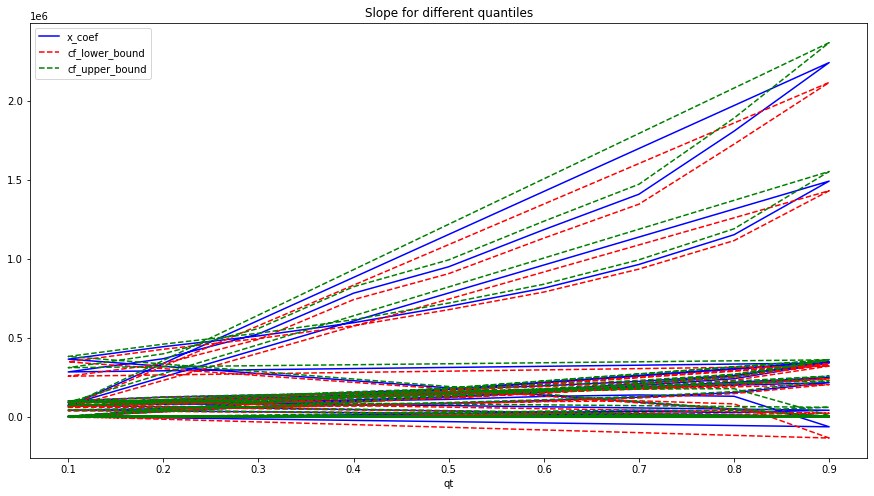

In [124]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

#Final MODELS

## Multicollinearity

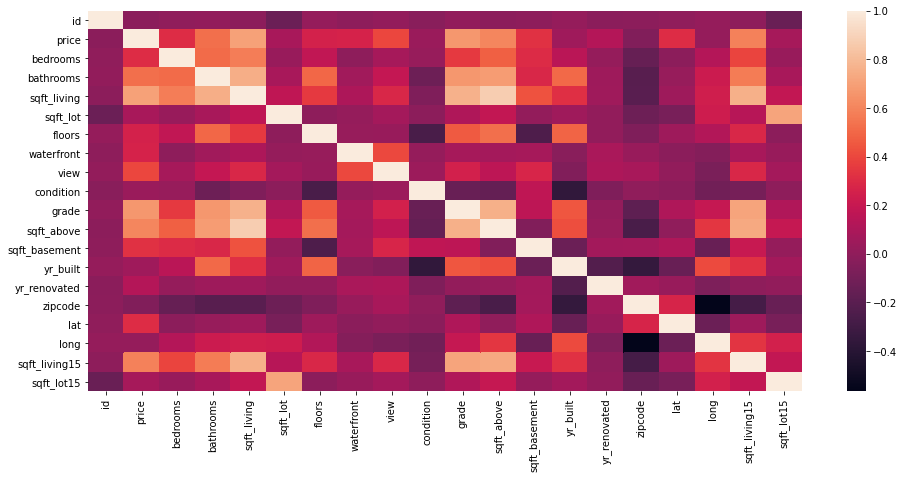

In [125]:
plt.figure(figsize = (16,7))
corr = housing.corr()
sns.heatmap(corr)

Looks likewe will go with our previous dataset

In [126]:
# Find the VIF matrix
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(housing.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028540,0.033969,0.002152,-0.005156,-1.078547e-02,0.077239,-0.011689,0.002847,-0.038108,0.021970,-0.048362,2.822075e-02,-1.367562e-03,0.023671,0.017587,0.000245,0.007392,-0.072991,0.009146,0.105496
price,0.033969,3.332295,0.301726,-0.287101,-7.824212e-01,-0.045576,-0.033555,-0.456966,-0.369703,-0.155362,-1.024667,-6.545554e-01,-2.236306e-01,0.699144,-0.072360,0.282693,-0.757299,0.271815,-0.134514,0.098148
bedrooms,0.002152,0.301726,1.679480,-0.487420,-6.863650e-01,0.045131,0.046820,0.021695,0.080986,-0.064722,0.214196,-3.785689e-01,-2.075553e-01,0.197799,0.039231,0.105773,-0.017745,0.042233,0.013095,0.094209
bathrooms,-0.005156,-0.287101,-0.487420,3.375989,-3.080639e+00,-0.020275,-0.672494,0.049452,-0.010460,-0.123931,-0.179562,1.618729e+00,4.571242e-01,-0.996017,-0.254241,0.017438,0.024134,0.030487,0.103587,0.062761
sqft_living,-0.010671,-0.785636,-0.684739,-3.079309,1.814600e+13,-0.073058,2.733193,0.032254,0.077197,-0.137856,-1.706775,-1.636081e+13,-8.743992e+12,0.302271,0.174530,-0.417095,0.123040,0.160806,-1.028101,-0.073623
sqft_lot,0.077239,-0.045576,0.045131,-0.020275,-7.361365e-02,2.109022,0.044783,0.034186,-0.056648,0.034427,-0.042716,-1.117718e-01,1.157131e-03,0.090422,0.023669,-0.006645,0.064838,-0.142649,0.166567,-1.452753
floors,-0.011689,-0.033555,0.046820,-0.672494,2.732644e+00,0.044783,2.012437,-0.001005,-0.035965,0.091136,-0.220090,-2.954203e+00,-6.953608e-01,-0.488547,-0.079459,-0.173633,-0.120062,0.162380,0.273871,0.070515
waterfront,0.002847,-0.456966,0.021695,0.049452,3.222799e-02,0.034186,-0.001005,1.266689,-0.442407,0.008657,0.189510,4.588843e-02,6.347172e-02,-0.116857,-0.055794,-0.016224,0.113775,-0.010586,0.072920,-0.031177
view,-0.038108,-0.369703,0.080986,-0.010460,7.681818e-02,-0.056648,-0.035965,-0.442407,1.477484,-0.004676,-0.070322,1.196197e-01,-2.265400e-01,0.073566,-0.031703,-0.171914,0.202148,0.044307,-0.310816,-0.021847
condition,0.021970,-0.155362,-0.064722,-0.123931,-1.381436e-01,0.034427,0.091136,0.008657,-0.004676,1.257283,-0.007603,2.443369e-01,-2.866157e-03,0.529293,0.210707,0.148039,0.099381,-0.021284,0.082421,-0.030425


In [127]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We will use the log transformation  for our target variable

Our VIF   scores  are fine ... we will proceed and create models

In [128]:
housing['price']= housing['price'].apply(np.log)

In [129]:
y=housing['price']

In [130]:
X=housing.drop(['price','id'],axis=1)

In [131]:
X.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Multiple Linear Regression

In [147]:
regressor = LinearRegression(fit_intercept = True, normalize = True)
regressor.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [148]:
y_pred = regressor.predict(X_test)

In [149]:
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

print(f'The root mean root square error of our model is \n{rmse}')
print(f'The  mean  square error of our model is\n{mse}')

The root mean root square error of our model is 
0.24961760883146425
The  mean  square error of our model is
0.062308950638737905


In [150]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's get the basic stats of our model
print(pd.DataFrame(residuals).describe())


             price
count  4322.000000
mean     -0.005343
std       0.249589
min      -1.030875
25%      -0.161464
50%      -0.005979
75%       0.158032
max       1.130024


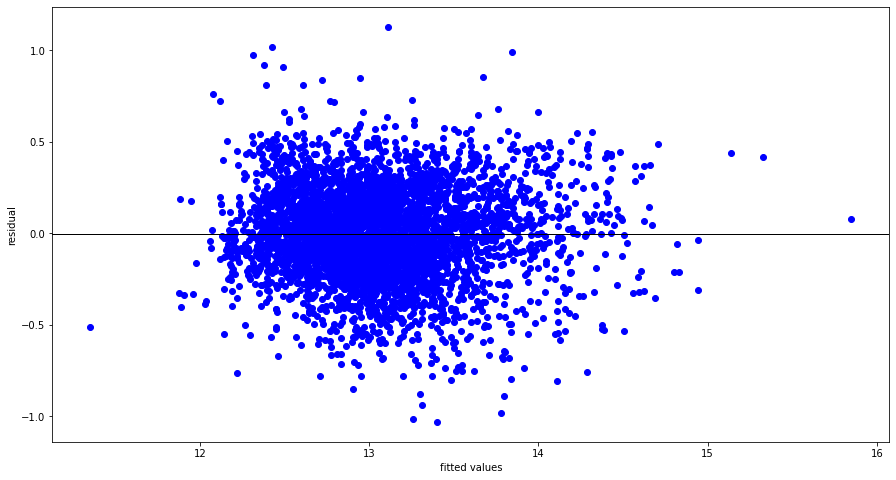

In [151]:
# a plot to find the residual plot
plt.scatter(y_pred, residuals, color='Blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

In [ ]:
#our datais almost centered at zero .... the next step we will perform a heteroskedasticity test to gain more insights

In [152]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

#Using bartlett's test establishes a null hypothesis that the variance is equal for all our datapoints, and the alternate hypothesis that the variance is different for at least one pair of datapoints.

inf
0.0
the variances are homogeneous!


lets see the variance

In [153]:
regressor.score(X,y)

0.7704578821461451

that is a high variance.... lets see if other models can reduce it 

## Lasso Regression

In [155]:
# first step is to scale our data
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler


# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)

In [156]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_train, y_train) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X_train, y_train)) 
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5354652085426006
lasso MSE: 0.1268561596792964
lasso coef: [-0.00000000e+00  0.00000000e+00  2.98024183e-04  2.90226682e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.40460916e-05 -1.15821210e-03
  7.32371160e-05  7.29906538e-04  0.00000000e+00 -0.00000000e+00
  2.08341984e-04 -1.03598379e-06]


In [162]:
# function to perform lasso regression


# function
class lass:
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def lass1(self):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

    linear = linear_model.LinearRegression()
    lasso = linear_model.Lasso() 
    gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

    # Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
    gridlasso.fit(X_train, y_train) 
    linear.fit(X_train, y_train) 
    print("lasso best parameters:", gridlasso.best_params_) 
    print("lasso score:", gridlasso.score(X_test, y_test))
    print("linear score:", linear.score(X_test, y_test)) 
    print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
    print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
    print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
    print("linear coef:", linear.coef_)

    def viz(X_train, y_train):
      coefsLasso = []
      alphasLasso = np.arange(0,20, 0.1)
      for i in range(200):
        lasso = linear_model.Lasso(alpha = alphasLasso[i])
        lasso.fit(X_train, y_train)
        coefsLasso.append(lasso.coef_)
        
      # Building Lasso coefficient plots
      plt.figure(figsize = (16,7))

      plt.subplot(121)
      plt.plot(alphasLasso, coefsLasso)
      plt.title('Lasso coefficients')
      plt.xlabel('alpha')
      plt.ylabel('coefs')

      plt.show()
    viz(X_train, y_train)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6366537124300314
linear score: 0.769140309696819
lasso MSE: 0.10198431855412533
linear MSE: 0.06479787740407972
lasso best estimator coef: [ 0.          0.          0.1443988   0.          0.          0.
  0.0052878   0.          0.13753867  0.          0.         -0.
  0.          0.          0.11249939 -0.          0.01150483  0.        ]
linear coef: [-1.11783466e-02  5.02854949e-02  4.94363979e+11  1.99826258e-02
  4.11832299e-02  3.14530306e-02  4.73132266e-02  4.02638369e-02
  1.85989629e-01 -4.45728711e+11 -2.38218611e+11 -1.00446066e-01
  1.26983966e-02 -3.53128684e-02  1.94392665e-01 -2.22993476e-02
  6.71985524e-02 -6.99147150e-03]


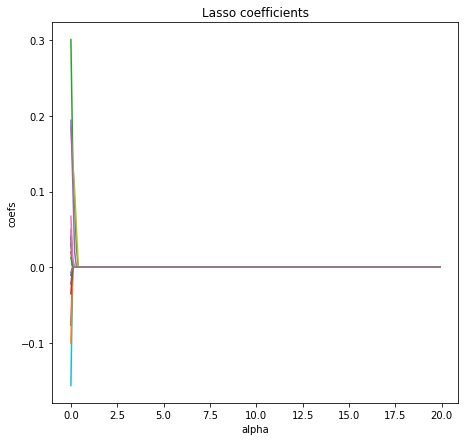

In [163]:
a = lass(X, y)
a.lass1()

choosing 

In [165]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha = 0.1) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6366537124300314
linear score: 0.769140309696819
lasso MSE: 0.10198431855412533
linear MSE: 0.06479787740407972
lasso best estimator coef: [ 0.          0.          0.1443988   0.          0.          0.
  0.0052878   0.          0.13753867  0.          0.         -0.
  0.          0.          0.11249939 -0.          0.01150483  0.        ]
linear coef: [-1.11783466e-02  5.02854949e-02  4.94363979e+11  1.99826258e-02
  4.11832299e-02  3.14530306e-02  4.73132266e-02  4.02638369e-02
  1.85989629e-01 -4.45728711e+11 -2.38218611e+11 -1.00446066e-01
  1.26983966e-02 -3.53128684e-02  1.94392665e-01 -2.22993476e-02
  6.71985524e-02 -6.99147150e-03]


choosing the correct valueof alpha hels reduce our Mean squared error

Almost 13  features have been rduced to zero after  regularisation  and our performance is better than the base line models performance here

##Ridge Regression

In [166]:
# determine most appropriate value for l2 regularization

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# find the alpha
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [168]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
print(second_model)

0.06480199937585006


In [170]:
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 4.575223164360926e-07,
 'bedrooms': 9.139671410522203e-05,
 'condition': 3.939061871483916e-05,
 'floors': 0.058484178999977945,
 'grade': 5.2006095524478006e-05,
 'id': -0.012294354316216206,
 'lat': 0.00010296123332151298,
 'long': -2.855097218992797e-07,
 'price': 0.0722467933293969,
 'sqft_above': -0.003394627940627539,
 'sqft_basement': 3.48682425478427e-05,
 'sqft_living': 0.0714047417102001,
 'sqft_lot': 0.3860840199880306,
 'view': 0.1603341189899092,
 'waterfront': 0.06307466795664311,
 'yr_built': -0.0006161490634364329,
 'yr_renovated': 1.3972247477877053,
 'zipcode': -0.15663750514369046}

##Elastic Net Regression

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [134]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

0.06230895063873971


In [135]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.0722467933293969,
 'bedrooms': -0.012294354316216206,
 'condition': 0.06307466795664311,
 'floors': 0.0714047417102001,
 'grade': 0.1603341189899092,
 'lat': 1.3972247477877053,
 'long': -0.15663750514369046,
 'sqft_above': 3.939061871483916e-05,
 'sqft_basement': 5.2006095524478006e-05,
 'sqft_living': 9.139671410522203e-05,
 'sqft_living15': 0.00010296123332151298,
 'sqft_lot': 4.575223164360926e-07,
 'sqft_lot15': -2.855097218992797e-07,
 'view': 0.058484178999977945,
 'waterfront': 0.3860840199880306,
 'yr_built': -0.003394627940627539,
 'yr_renovated': 3.48682425478427e-05,
 'zipcode': -0.0006161490634364329}

In [136]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [137]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)

0.06443786416919421

In [138]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [139]:

# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
print(second_model)

0.06251526088275738


In [140]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that no column was removed so all the columns were good for the algorithm
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 0.06412046317393577,
 'bedrooms': -0.006557153779238598,
 'condition': 0.06103156625966891,
 'floors': 0.06872819268077657,
 'grade': 0.14622416512004952,
 'lat': 1.3452784239528195,
 'long': -0.14483831636031858,
 'sqft_above': 6.217047810291598e-05,
 'sqft_basement': 7.374643293946067e-05,
 'sqft_living': 7.934375364996908e-05,
 'sqft_living15': 0.00010131465192015497,
 'sqft_lot': 3.4269371899776807e-07,
 'sqft_lot15': -7.825542917629607e-08,
 'view': 0.06091913458644495,
 'waterfront': 0.3519923137440687,
 'yr_built': -0.002974593044317282,
 'yr_renovated': 3.952496612194647e-05,
 'zipcode': -0.0004848003149785546}

At the end .. ourelastic model perfomed not any better than our linear model 

and the errors are huge ... this is an indicateion that  this type of regression was not the best suited for this data 

##Quantile Regression

In [173]:
# prepare the quantile that we want to work with
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# loop to change the columns
for i in np.arange(0,19,1):
  
  x = X.iloc[:,i]
  mod = smf.quantreg('y ~ x',housing)
  # loop to calculate the quantile data
  for qt in quantiles:
    
    res = mod.fit(q = qt)
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

      qt     intercept        x_coef  cf_lower_bound  cf_upper_bound
0    0.1  2.763870e-19  1.908238e-09    1.869290e-09    1.947187e-09
1    0.2  2.837493e-19  1.933366e-09    1.897019e-09    1.969712e-09
2    0.3  2.915833e-19  1.959748e-09    1.910420e-09    2.009075e-09
3    0.4  2.999333e-19  1.987480e-09    1.945355e-09    2.029606e-09
4    0.5  3.088494e-19  2.016670e-09    1.981559e-09    2.051781e-09
..   ...           ...           ...             ...             ...
166  0.5  1.300039e+01  1.565069e-06    1.260739e-06    1.869398e-06
167  0.6  1.313482e+01  1.610141e-06    1.302268e-06    1.918015e-06
168  0.7  1.326842e+01  1.845271e-06    1.558583e-06    2.131959e-06
169  0.8  1.343574e+01  2.170577e-06    1.883399e-06    2.457756e-06
170  0.9  1.364947e+01  3.610383e-06    3.320134e-06    3.900633e-06

[171 rows x 5 columns]


In [174]:

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.005679
Model:                       QuantReg   Bandwidth:                     0.07354
Method:                 Least Squares   Sparsity:                        3.241
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        20:03:12   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6495      0.007   1984.492      0.000      13.636      13.663
x            3.61e-06   1.48e-07     24.381      0.000    3.32e-06     3.9e-06

The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


<Figure size 1080x576 with 0 Axes>

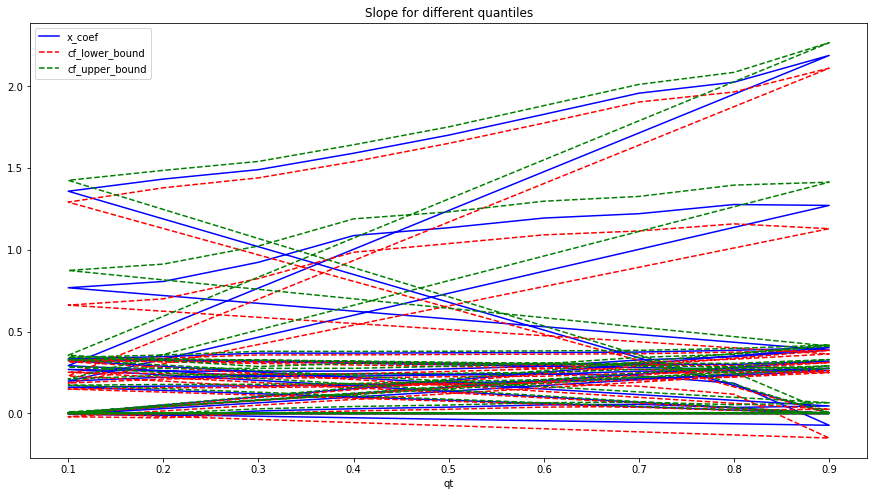

In [175]:
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()